In [26]:
# 模块导入
import shapefile
import matplotlib.pyplot as plt
# plt设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False # 设置显示负号

In [28]:
# 读取数据
file_path = r"data\chengdu\chengdu.shp"
sf = shapefile.Reader(file_path, encoding='gbk') # 读取shp文件
shapes = sf.shapes() # .shapes()读取几何数据信息，存放着该文件中所有对象的 几何数据
records = sf.records() # .records()读取属性数据信息，存放着该文件中所有对象的 属性数据

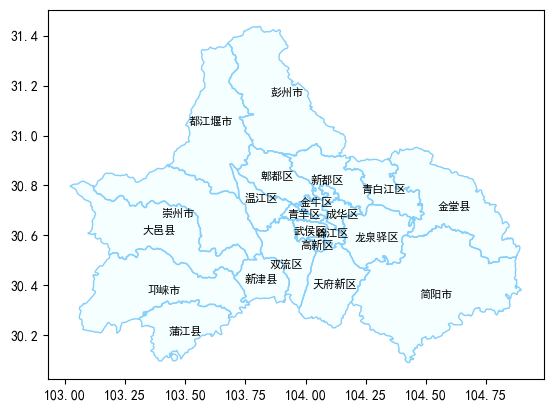

In [31]:
# 画出成都市的区县分布图
fig, ax = plt.subplots()  # 生成一张图和一张子图

for i in range(len(shapes)): # 画出成都市所有的区县
    pts = shapes[i].points # 获取每个区县的所有点
    x,y = zip(*pts) # 将所有点的x坐标和y坐标分别提取出来
    ax.plot(x, y, '-', lw=1, color='lightskyblue') # 画出 lw表示线宽
    ax.fill(x, y, color='lightcyan', alpha=0.3) # 填充多边形 alpha表示透明度
    id = records[i][0] # 获取id
    name = records[i][1] # 获取区县名称
    # 获取区县的中心点坐标
    bbox = shapes[i].bbox
    x = (bbox[0] + bbox[2]) / 2
    y = (bbox[1] + bbox[3]) / 2
    # 在每个区县的中心点标注区县名称
    ax.text(x, y, name, fontsize=8, ha='center', va='center', color='k')
plt.savefig("chengdu_city.png", dpi=300, bbox_inches='tight')